<div style="padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:250%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 15px 10px 7px gray;
           letter-spacing:0.5px;
            margin: 15px 15px 15px 15px"><h1>🛣️Clean/Littered Road Classification Using Deep Learning</h1></div> 

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>📚 1. Imports</h2></div>

In [1]:
# system library
import os

# math and tables
import pandas as pd
import numpy as np

# for model building
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# visualization libraries
import cv2
import matplotlib.pyplot as plt

# some utils
from sklearn.model_selection import train_test_split
from random import randint

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;
            margin: 15px 15px 15px 15px'><h2>📥 2. Data Loading, Formatting and Some Parameters</h2></div>

<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">There are only 2 classes: <b>clean road</b> and <b>dirty road</b>
File "metadata.csv" contains the file path location of each image and their labels. Images will be resized in process of loading. The size is stored in the variable <i>img_size</i>.</div>

In [3]:
import cv2
import numpy as np
import pandas as pd
from google.colab import files

# Upload the data files (metadata.csv and images folder) to the Colab environment

# Read the metadata.csv file
labels_df = pd.read_csv('/content/metadata.csv')
print('\n\nlabels dataframe:\n', labels_df.head(), '\n\n')

# Set the path to the images folder
images_path = '/content/images/'

# Remove labels.csv because it's not a class
class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')

labels = []
images = []
for idx, row in labels_df.iterrows():
    image_path = images_path + row[0]
    print(f"Processing image: {image_path}")
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image, img_size[0:2])[:, :, ::-1]
    images.append(np.asarray(resized_image))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(num_classes)
    label[row[1]] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')




labels dataframe:
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)
Processing image: /content/images/dirty_2.jpg
Processing image: /content/images/clean_36.jpg
Processing image: /content/images/clean_31.jpg
Processing image: /content/images/dirty_69.jpg
Processing image: /content/images/clean_113.jpg
Processing image: /content/images/clean_102.jpg
Processing image: /content/images/clean_43.jpg
Processing image: /content/images/dirty_27.jpg
Processing image: /content/images/dirty_53.jpg
Processing image: /content/images/clean_55.jpg
Processing image: /content/images/clean_28.jpg
Processing image: /content/images/dirty_55.jpg
Processing image: /content/images/clean_103.jpg
Processing image: /content/images/dirty_31.jpg
Processing image: /content/images/dirty_22.jpg
Processing image: /content/images/dirty_118.jpg
Processing image: /co

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>🏞️ 3. Data Visualisation</h2></div>

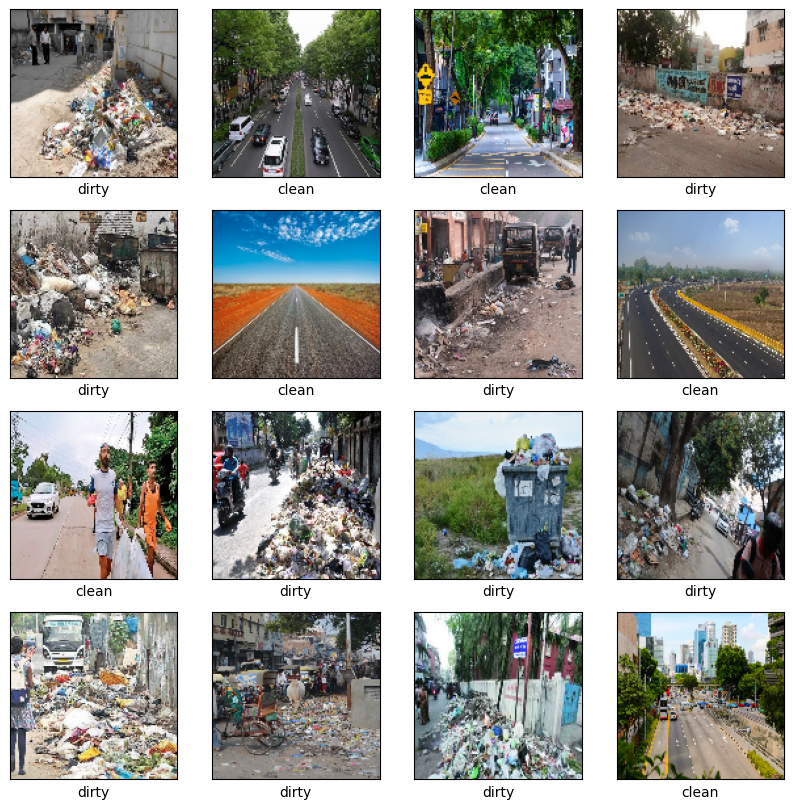

In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

# Your previous code...

# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images) - 1)

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()


<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>🪓 4. Train/Validation Split</h2></div>

<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">Data will be split into training and validation category.</div>

In [6]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (213, 128, 128, 3)
train labels shape: (213, 2)

validation images shape: (24, 128, 128, 3)
validation labels shape: (24, 2)



<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>➕ 5. Data Augmentation</h2></div>

<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">The dataset is small, so use data augmentation.</div>

In [7]:
# ImageDataGenerator for train images
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True, 
                                                                         horizontal_flip=True)
train_images_generator = train_images_generator.flow(X_train, y=y_train)

# ImageDataGenerator for validation images
validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True, 
                                                                              horizontal_flip=True)
validation_images_generator = validation_images_generator.flow(X_val, y=y_val)

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>6. CNN Model</h2></div>

<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">The cnn_model will consist of an input <i>rescaling layer</i>, 3 <i>convolution layers blocks</i> and 4 <i>dense layers</i> after them. Input <i>rescaling layer</i>, which converts the values into a format from 0 to 1. The <i>block of convolution layers</i> contains 2 <i>convolution layers</i> and 1 <i>max pooling layer</i> after them (+ <i>global average pooling</i> if it is a jump from <i>convolutional layers</i> to <i>dense</i>). And the output <i>dense layer</i> contains as many neurons as there are classes.</div>

In [8]:
def get_model():
    cnn_model = tf.keras.Sequential()

    # Inputs and rescaling
    cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size[0], img_size[1], img_size[2])))

    # Convolutional block 1
    cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    # Convolutional block 2
    cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    # Convolutional block 3
    cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
    cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())

    # Dense block
    cnn_model.add(tf.keras.layers.Dense(512, activation='relu'))
    cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
    cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
    cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
    cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


    cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>🎫 7. Lottery Ticket Hypothesis Realizing</h2></div>

<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">About lottery ticket hypotesis - <a href='https://arxiv.org/abs/1803.03635'>https://arxiv.org/abs/1803.03635</a></div>

In [9]:
# my lottery ticket hypotesis realization
min_loss = 10
for seed in np.linspace(1, 257654, 15).astype(int):
    tf.random.set_seed(seed)
    cnn_model = get_model()
    
    loss = cnn_model.fit(train_images_generator, epochs=1, verbose=1, steps_per_epoch=100).history['loss'][0]
    if loss < min_loss:
        min_loss = loss
        best_model = cnn_model
    
print(f'\n\nmin loss: {min_loss}', best_model.summary())

  7/100 [=>............................] - ETA: 12:39 - loss: 0.6962 - accuracy: 0.4601

  7/100 [=>............................] - ETA: 11:57 - loss: 0.6998 - accuracy: 0.5164

  7/100 [=>............................] - ETA: 12:32 - loss: 0.6936 - accuracy: 0.5023

  7/100 [=>............................] - ETA: 11:24 - loss: 0.6948 - accuracy: 0.5164

  7/100 [=>............................] - ETA: 11:27 - loss: 0.6940 - accuracy: 0.5164

  7/100 [=>............................] - ETA: 12:03 - loss: 0.7022 - accuracy: 0.5023

  7/100 [=>............................] - ETA: 11:25 - loss: 0.6966 - accuracy: 0.4648

  7/100 [=>............................] - ETA: 12:20 - loss: 0.6968 - accuracy: 0.4695

  7/100 [=>............................] - ETA: 11:52 - loss: 0.6941 - accuracy: 0.4883

  7/100 [=>............................] - ETA: 11:46 - loss: 0.6993 - accuracy: 0.5164

  7/100 [=>............................] - ETA: 11:26 - loss: 0.6955 - accuracy: 0.4648

  7/100 [=>............................] - ETA: 11:30 - loss: 0.6899 - accuracy: 0.5164

  7/100 [=>............................] - ETA: 11:29 - loss: 0.6987 - accuracy: 0.4883

  7/100 [=>............................] - ETA: 11:53 - loss: 0.6939 - accuracy: 0.4601

  7/100 [=>............................] - ETA: 11:45 - loss: 0.6955 - accuracy: 0.5164

100/100 [==============================] - 56s 460ms/step - loss: 0.6955 - accuracy: 0.5164
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_67 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 64, 64, 128)       32896     
                                                                 
 conv2d_69 (Conv2D)        

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>📈 8. Training and Results</h2></div>

In [10]:
# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}')

In [11]:
history = best_model.fit(train_images_generator, epochs=200, verbose=1, validation_data=validation_images_generator, callbacks=[checkpoint_callback])

Epoch 1/200
7/7 [==============================] - ETA: 0s - loss: 0.7004 - accuracy: 0.4695

7/7 [==============================] - 59s 9s/step - loss: 0.7004 - accuracy: 0.4695 - val_loss: 0.6941 - val_accuracy: 0.4167
Epoch 2/200
7/7 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.4836

7/7 [==============================] - 58s 9s/step - loss: 0.6931 - accuracy: 0.4836 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/200
7/7 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4836

7/7 [==============================] - 59s 8s/step - loss: 0.6932 - accuracy: 0.4836 - val_loss: 0.6909 - val_accuracy: 0.5833
Epoch 4/200
7/7 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5164

7/7 [==============================] - 58s 8s/step - loss: 0.6907 - accuracy: 0.5164 - val_loss: 0.6768 - val_accuracy: 0.5833
Epoch 5/200
7/7 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5164

7/7 [==============================] - 58s 8s/step - loss: 0.6931 - accuracy: 0.5164 - val_loss: 0.6795 - val_accuracy: 0.5833
Epoch 6/200
7/7 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5164

7/7 [==============================] - 58s 9s/step - loss: 0.6881 - accuracy: 0.5164 - val_loss: 0.6689 - val_accuracy: 0.5833
Epoch 7/200
7/7 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.5164

7/7 [==============================] - 57s 8s/step - loss: 0.6727 - accuracy: 0.5164 - val_loss: 0.6193 - val_accuracy: 0.5833
Epoch 8/200
7/7 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.5728

7/7 [==============================] - 57s 8s/step - loss: 0.6398 - accuracy: 0.5728 - val_loss: 0.6818 - val_accuracy: 0.5833
Epoch 9/200
7/7 [==============================] - ETA: 0s - loss: 0.6179 - accuracy: 0.7042

7/7 [==============================] - 57s 8s/step - loss: 0.6179 - accuracy: 0.7042 - val_loss: 0.5713 - val_accuracy: 0.8333
Epoch 10/200
7/7 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.7465

7/7 [==============================] - 58s 8s/step - loss: 0.6144 - accuracy: 0.7465 - val_loss: 0.5485 - val_accuracy: 0.7917
Epoch 11/200
7/7 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5540

7/7 [==============================] - 58s 8s/step - loss: 0.6935 - accuracy: 0.5540 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 12/200
7/7 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.5775

7/7 [==============================] - 58s 8s/step - loss: 0.6596 - accuracy: 0.5775 - val_loss: 0.6398 - val_accuracy: 0.7500
Epoch 13/200
7/7 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.6808

7/7 [==============================] - 57s 8s/step - loss: 0.6420 - accuracy: 0.6808 - val_loss: 0.6082 - val_accuracy: 0.5833
Epoch 14/200
7/7 [==============================] - ETA: 0s - loss: 0.5865 - accuracy: 0.7089

7/7 [==============================] - 57s 8s/step - loss: 0.5865 - accuracy: 0.7089 - val_loss: 0.4814 - val_accuracy: 0.8333
Epoch 15/200
7/7 [==============================] - ETA: 0s - loss: 0.4970 - accuracy: 0.7559

7/7 [==============================] - 58s 8s/step - loss: 0.4970 - accuracy: 0.7559 - val_loss: 0.6626 - val_accuracy: 0.7917
Epoch 16/200
7/7 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.7840

7/7 [==============================] - 57s 8s/step - loss: 0.4711 - accuracy: 0.7840 - val_loss: 0.4288 - val_accuracy: 0.7917
Epoch 17/200
7/7 [==============================] - ETA: 0s - loss: 0.4891 - accuracy: 0.7653

7/7 [==============================] - 58s 8s/step - loss: 0.4891 - accuracy: 0.7653 - val_loss: 0.4307 - val_accuracy: 0.8333
Epoch 18/200
7/7 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.7793

7/7 [==============================] - 57s 8s/step - loss: 0.4751 - accuracy: 0.7793 - val_loss: 0.4739 - val_accuracy: 0.8333
Epoch 19/200
7/7 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.7840

7/7 [==============================] - 57s 8s/step - loss: 0.4619 - accuracy: 0.7840 - val_loss: 0.4455 - val_accuracy: 0.8333
Epoch 20/200
7/7 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.8216

7/7 [==============================] - 57s 8s/step - loss: 0.4178 - accuracy: 0.8216 - val_loss: 0.4603 - val_accuracy: 0.8333
Epoch 21/200
7/7 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.7840

7/7 [==============================] - 58s 8s/step - loss: 0.4364 - accuracy: 0.7840 - val_loss: 0.4128 - val_accuracy: 0.8333
Epoch 22/200
7/7 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.7793

7/7 [==============================] - 57s 9s/step - loss: 0.4659 - accuracy: 0.7793 - val_loss: 0.4835 - val_accuracy: 0.7917
Epoch 23/200
7/7 [==============================] - ETA: 0s - loss: 0.4533 - accuracy: 0.7981

7/7 [==============================] - 58s 8s/step - loss: 0.4533 - accuracy: 0.7981 - val_loss: 0.5553 - val_accuracy: 0.7917
Epoch 24/200
7/7 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.7934

7/7 [==============================] - 56s 8s/step - loss: 0.4100 - accuracy: 0.7934 - val_loss: 0.4147 - val_accuracy: 0.8333
Epoch 25/200
7/7 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8216

7/7 [==============================] - 57s 8s/step - loss: 0.3844 - accuracy: 0.8216 - val_loss: 0.6199 - val_accuracy: 0.7917
Epoch 26/200
7/7 [==============================] - ETA: 0s - loss: 0.4408 - accuracy: 0.8028

7/7 [==============================] - 58s 8s/step - loss: 0.4408 - accuracy: 0.8028 - val_loss: 0.8813 - val_accuracy: 0.7083
Epoch 27/200
7/7 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.6479

7/7 [==============================] - 57s 9s/step - loss: 0.5996 - accuracy: 0.6479 - val_loss: 0.4611 - val_accuracy: 0.7917
Epoch 28/200
7/7 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.7653

7/7 [==============================] - 57s 8s/step - loss: 0.4960 - accuracy: 0.7653 - val_loss: 0.4207 - val_accuracy: 0.8333
Epoch 29/200
7/7 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.8122

7/7 [==============================] - 57s 8s/step - loss: 0.4535 - accuracy: 0.8122 - val_loss: 0.3810 - val_accuracy: 0.8750
Epoch 30/200
7/7 [==============================] - ETA: 0s - loss: 0.3873 - accuracy: 0.8545

7/7 [==============================] - 58s 8s/step - loss: 0.3873 - accuracy: 0.8545 - val_loss: 0.4513 - val_accuracy: 0.8333
Epoch 31/200
7/7 [==============================] - ETA: 0s - loss: 0.3814 - accuracy: 0.8404

7/7 [==============================] - 58s 9s/step - loss: 0.3814 - accuracy: 0.8404 - val_loss: 0.6338 - val_accuracy: 0.7917
Epoch 32/200
7/7 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8451

7/7 [==============================] - 57s 8s/step - loss: 0.3428 - accuracy: 0.8451 - val_loss: 0.3436 - val_accuracy: 0.8750
Epoch 33/200
7/7 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.8028

7/7 [==============================] - 56s 9s/step - loss: 0.4125 - accuracy: 0.8028 - val_loss: 0.3594 - val_accuracy: 0.9167
Epoch 34/200
7/7 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.8310

7/7 [==============================] - 58s 8s/step - loss: 0.3938 - accuracy: 0.8310 - val_loss: 0.3545 - val_accuracy: 0.8750
Epoch 35/200
7/7 [==============================] - ETA: 0s - loss: 0.3722 - accuracy: 0.8498

7/7 [==============================] - 57s 9s/step - loss: 0.3722 - accuracy: 0.8498 - val_loss: 0.4060 - val_accuracy: 0.8333
Epoch 36/200
7/7 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.8498

7/7 [==============================] - 57s 9s/step - loss: 0.3423 - accuracy: 0.8498 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 37/200
7/7 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.8826

7/7 [==============================] - 62s 8s/step - loss: 0.3043 - accuracy: 0.8826 - val_loss: 0.3321 - val_accuracy: 0.9167
Epoch 38/200
7/7 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.8732

7/7 [==============================] - 56s 8s/step - loss: 0.3202 - accuracy: 0.8732 - val_loss: 0.4846 - val_accuracy: 0.8333
Epoch 39/200
7/7 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.8545

7/7 [==============================] - 57s 8s/step - loss: 0.3238 - accuracy: 0.8545 - val_loss: 0.3705 - val_accuracy: 0.8750
Epoch 40/200
7/7 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.8967

7/7 [==============================] - 57s 8s/step - loss: 0.2665 - accuracy: 0.8967 - val_loss: 0.3742 - val_accuracy: 0.8750
Epoch 41/200
7/7 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.8685

7/7 [==============================] - 58s 9s/step - loss: 0.3009 - accuracy: 0.8685 - val_loss: 0.5249 - val_accuracy: 0.7917
Epoch 42/200
7/7 [==============================] - ETA: 0s - loss: 0.4282 - accuracy: 0.8216

7/7 [==============================] - 58s 9s/step - loss: 0.4282 - accuracy: 0.8216 - val_loss: 0.4181 - val_accuracy: 0.8750
Epoch 43/200
7/7 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.8263

7/7 [==============================] - 56s 8s/step - loss: 0.4215 - accuracy: 0.8263 - val_loss: 0.5252 - val_accuracy: 0.7500
Epoch 44/200
7/7 [==============================] - ETA: 0s - loss: 0.3992 - accuracy: 0.7981

7/7 [==============================] - 59s 8s/step - loss: 0.3992 - accuracy: 0.7981 - val_loss: 0.4518 - val_accuracy: 0.7917
Epoch 45/200
7/7 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.8592

7/7 [==============================] - 58s 9s/step - loss: 0.3807 - accuracy: 0.8592 - val_loss: 0.3757 - val_accuracy: 0.8333
Epoch 46/200
7/7 [==============================] - ETA: 0s - loss: 0.3588 - accuracy: 0.8498

7/7 [==============================] - 58s 8s/step - loss: 0.3588 - accuracy: 0.8498 - val_loss: 0.3009 - val_accuracy: 0.8750
Epoch 47/200
7/7 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.8732

7/7 [==============================] - 57s 8s/step - loss: 0.3423 - accuracy: 0.8732 - val_loss: 0.3423 - val_accuracy: 0.7917
Epoch 48/200
7/7 [==============================] - ETA: 0s - loss: 0.3093 - accuracy: 0.8873

7/7 [==============================] - 57s 8s/step - loss: 0.3093 - accuracy: 0.8873 - val_loss: 0.3407 - val_accuracy: 0.8750
Epoch 49/200
7/7 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.8967

7/7 [==============================] - 58s 8s/step - loss: 0.2778 - accuracy: 0.8967 - val_loss: 0.3480 - val_accuracy: 0.8750
Epoch 50/200
7/7 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.8732

7/7 [==============================] - 58s 9s/step - loss: 0.3098 - accuracy: 0.8732 - val_loss: 0.3722 - val_accuracy: 0.8750
Epoch 51/200
7/7 [==============================] - ETA: 0s - loss: 0.4542 - accuracy: 0.8216

7/7 [==============================] - 58s 8s/step - loss: 0.4542 - accuracy: 0.8216 - val_loss: 0.9028 - val_accuracy: 0.5417
Epoch 52/200
7/7 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.7653

7/7 [==============================] - 58s 8s/step - loss: 0.4514 - accuracy: 0.7653 - val_loss: 0.4718 - val_accuracy: 0.7083
Epoch 53/200
7/7 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.7746

7/7 [==============================] - 57s 8s/step - loss: 0.4355 - accuracy: 0.7746 - val_loss: 0.4098 - val_accuracy: 0.8333
Epoch 54/200
7/7 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.7793

7/7 [==============================] - 57s 8s/step - loss: 0.4397 - accuracy: 0.7793 - val_loss: 0.4439 - val_accuracy: 0.7917
Epoch 55/200
7/7 [==============================] - ETA: 0s - loss: 0.3738 - accuracy: 0.8263

7/7 [==============================] - 58s 9s/step - loss: 0.3738 - accuracy: 0.8263 - val_loss: 0.3412 - val_accuracy: 0.9167
Epoch 56/200
7/7 [==============================] - ETA: 0s - loss: 0.3864 - accuracy: 0.8310

7/7 [==============================] - 58s 8s/step - loss: 0.3864 - accuracy: 0.8310 - val_loss: 0.3543 - val_accuracy: 0.7917
Epoch 57/200
7/7 [==============================] - ETA: 0s - loss: 0.3262 - accuracy: 0.8451

7/7 [==============================] - 57s 8s/step - loss: 0.3262 - accuracy: 0.8451 - val_loss: 0.2956 - val_accuracy: 0.9167
Epoch 58/200
7/7 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.8920

7/7 [==============================] - 57s 8s/step - loss: 0.2872 - accuracy: 0.8920 - val_loss: 0.4902 - val_accuracy: 0.6667
Epoch 59/200
7/7 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.8685

7/7 [==============================] - 59s 8s/step - loss: 0.2994 - accuracy: 0.8685 - val_loss: 0.3639 - val_accuracy: 0.7917
Epoch 60/200
7/7 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.8967

7/7 [==============================] - 58s 8s/step - loss: 0.2630 - accuracy: 0.8967 - val_loss: 0.3786 - val_accuracy: 0.8750
Epoch 61/200
7/7 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.8498

7/7 [==============================] - 58s 8s/step - loss: 0.3572 - accuracy: 0.8498 - val_loss: 0.6358 - val_accuracy: 0.7917
Epoch 62/200
7/7 [==============================] - ETA: 0s - loss: 0.3960 - accuracy: 0.8404

7/7 [==============================] - 58s 8s/step - loss: 0.3960 - accuracy: 0.8404 - val_loss: 0.4638 - val_accuracy: 0.7083
Epoch 63/200
7/7 [==============================] - ETA: 0s - loss: 0.3652 - accuracy: 0.8592

7/7 [==============================] - 57s 8s/step - loss: 0.3652 - accuracy: 0.8592 - val_loss: 0.3191 - val_accuracy: 0.9167
Epoch 64/200
7/7 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8685

7/7 [==============================] - 58s 8s/step - loss: 0.3213 - accuracy: 0.8685 - val_loss: 0.3500 - val_accuracy: 0.9167
Epoch 65/200
7/7 [==============================] - ETA: 0s - loss: 0.2976 - accuracy: 0.8826

7/7 [==============================] - 58s 8s/step - loss: 0.2976 - accuracy: 0.8826 - val_loss: 0.3883 - val_accuracy: 0.7917
Epoch 66/200
7/7 [==============================] - ETA: 0s - loss: 0.2708 - accuracy: 0.8779

7/7 [==============================] - 59s 9s/step - loss: 0.2708 - accuracy: 0.8779 - val_loss: 0.3950 - val_accuracy: 0.7917
Epoch 67/200
7/7 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.8404

7/7 [==============================] - 58s 9s/step - loss: 0.3225 - accuracy: 0.8404 - val_loss: 0.3736 - val_accuracy: 0.7917
Epoch 68/200
7/7 [==============================] - ETA: 0s - loss: 0.2687 - accuracy: 0.8826

7/7 [==============================] - 58s 8s/step - loss: 0.2687 - accuracy: 0.8826 - val_loss: 0.4833 - val_accuracy: 0.7500
Epoch 69/200
7/7 [==============================] - ETA: 0s - loss: 0.2601 - accuracy: 0.8779

7/7 [==============================] - 59s 8s/step - loss: 0.2601 - accuracy: 0.8779 - val_loss: 0.2920 - val_accuracy: 0.8333
Epoch 70/200
7/7 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.2177 - accuracy: 0.9249 - val_loss: 0.5421 - val_accuracy: 0.7500
Epoch 71/200
7/7 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8592

7/7 [==============================] - 60s 9s/step - loss: 0.3073 - accuracy: 0.8592 - val_loss: 0.3095 - val_accuracy: 0.8333
Epoch 72/200
7/7 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.8498

7/7 [==============================] - 58s 9s/step - loss: 0.3409 - accuracy: 0.8498 - val_loss: 0.3012 - val_accuracy: 0.8333
Epoch 73/200
7/7 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.8967

7/7 [==============================] - 58s 8s/step - loss: 0.2408 - accuracy: 0.8967 - val_loss: 0.2311 - val_accuracy: 0.8750
Epoch 74/200
7/7 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9014

7/7 [==============================] - 58s 8s/step - loss: 0.2442 - accuracy: 0.9014 - val_loss: 0.2754 - val_accuracy: 0.9167
Epoch 75/200
7/7 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.9014

7/7 [==============================] - 59s 8s/step - loss: 0.2263 - accuracy: 0.9014 - val_loss: 0.2871 - val_accuracy: 0.8750
Epoch 76/200
7/7 [==============================] - ETA: 0s - loss: 0.2259 - accuracy: 0.8920

7/7 [==============================] - 58s 9s/step - loss: 0.2259 - accuracy: 0.8920 - val_loss: 0.1803 - val_accuracy: 0.9583
Epoch 77/200
7/7 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9014

7/7 [==============================] - 58s 8s/step - loss: 0.2453 - accuracy: 0.9014 - val_loss: 0.3997 - val_accuracy: 0.9167
Epoch 78/200
7/7 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.9014

7/7 [==============================] - 59s 9s/step - loss: 0.2515 - accuracy: 0.9014 - val_loss: 0.3720 - val_accuracy: 0.8750
Epoch 79/200
7/7 [==============================] - ETA: 0s - loss: 0.2772 - accuracy: 0.8873

7/7 [==============================] - 62s 9s/step - loss: 0.2772 - accuracy: 0.8873 - val_loss: 0.2918 - val_accuracy: 0.8750
Epoch 80/200
7/7 [==============================] - ETA: 0s - loss: 0.2415 - accuracy: 0.8967

7/7 [==============================] - 57s 9s/step - loss: 0.2415 - accuracy: 0.8967 - val_loss: 0.2411 - val_accuracy: 0.9167
Epoch 81/200
7/7 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9155

7/7 [==============================] - 58s 8s/step - loss: 0.2169 - accuracy: 0.9155 - val_loss: 0.1727 - val_accuracy: 0.9583
Epoch 82/200
7/7 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8873

7/7 [==============================] - 61s 9s/step - loss: 0.2727 - accuracy: 0.8873 - val_loss: 0.2545 - val_accuracy: 0.8750
Epoch 83/200
7/7 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9249

7/7 [==============================] - 57s 8s/step - loss: 0.1919 - accuracy: 0.9249 - val_loss: 0.2913 - val_accuracy: 0.8750
Epoch 84/200
7/7 [==============================] - ETA: 0s - loss: 0.1977 - accuracy: 0.9343

7/7 [==============================] - 58s 9s/step - loss: 0.1977 - accuracy: 0.9343 - val_loss: 0.6879 - val_accuracy: 0.7917
Epoch 85/200
7/7 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9249

7/7 [==============================] - 57s 8s/step - loss: 0.2104 - accuracy: 0.9249 - val_loss: 0.2098 - val_accuracy: 0.9583
Epoch 86/200
7/7 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.9014

7/7 [==============================] - 58s 8s/step - loss: 0.2342 - accuracy: 0.9014 - val_loss: 0.2221 - val_accuracy: 0.9583
Epoch 87/200
7/7 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.8826

7/7 [==============================] - 58s 8s/step - loss: 0.2649 - accuracy: 0.8826 - val_loss: 1.4950 - val_accuracy: 0.5833
Epoch 88/200
7/7 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.8685

7/7 [==============================] - 63s 10s/step - loss: 0.3079 - accuracy: 0.8685 - val_loss: 0.5334 - val_accuracy: 0.7917
Epoch 89/200
7/7 [==============================] - ETA: 0s - loss: 0.3048 - accuracy: 0.8451

7/7 [==============================] - 57s 8s/step - loss: 0.3048 - accuracy: 0.8451 - val_loss: 0.1834 - val_accuracy: 0.9583
Epoch 90/200
7/7 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.8826

7/7 [==============================] - 57s 8s/step - loss: 0.2403 - accuracy: 0.8826 - val_loss: 0.4575 - val_accuracy: 0.8750
Epoch 91/200
7/7 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.8451

7/7 [==============================] - 58s 8s/step - loss: 0.2837 - accuracy: 0.8451 - val_loss: 0.2237 - val_accuracy: 0.8750
Epoch 92/200
7/7 [==============================] - ETA: 0s - loss: 0.2644 - accuracy: 0.8685

7/7 [==============================] - 58s 8s/step - loss: 0.2644 - accuracy: 0.8685 - val_loss: 0.7912 - val_accuracy: 0.7917
Epoch 93/200
7/7 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.8920

7/7 [==============================] - 57s 8s/step - loss: 0.2336 - accuracy: 0.8920 - val_loss: 0.3838 - val_accuracy: 0.7917
Epoch 94/200
7/7 [==============================] - ETA: 0s - loss: 0.1983 - accuracy: 0.9061

7/7 [==============================] - 57s 8s/step - loss: 0.1983 - accuracy: 0.9061 - val_loss: 0.2024 - val_accuracy: 0.9583
Epoch 95/200
7/7 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9061

7/7 [==============================] - 58s 8s/step - loss: 0.2046 - accuracy: 0.9061 - val_loss: 0.2606 - val_accuracy: 0.9167
Epoch 96/200
7/7 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.1808 - accuracy: 0.9249 - val_loss: 0.1960 - val_accuracy: 0.9583
Epoch 97/200
7/7 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9437

7/7 [==============================] - 57s 8s/step - loss: 0.1494 - accuracy: 0.9437 - val_loss: 0.8863 - val_accuracy: 0.7500
Epoch 98/200
7/7 [==============================] - ETA: 0s - loss: 0.1802 - accuracy: 0.9014

7/7 [==============================] - 65s 9s/step - loss: 0.1802 - accuracy: 0.9014 - val_loss: 0.3923 - val_accuracy: 0.8333
Epoch 99/200
7/7 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.8967

7/7 [==============================] - 58s 8s/step - loss: 0.2701 - accuracy: 0.8967 - val_loss: 0.3191 - val_accuracy: 0.8750
Epoch 100/200
7/7 [==============================] - ETA: 0s - loss: 0.2415 - accuracy: 0.8920

7/7 [==============================] - 59s 8s/step - loss: 0.2415 - accuracy: 0.8920 - val_loss: 0.1855 - val_accuracy: 0.9583
Epoch 101/200
7/7 [==============================] - ETA: 0s - loss: 0.2270 - accuracy: 0.9014

7/7 [==============================] - 58s 8s/step - loss: 0.2270 - accuracy: 0.9014 - val_loss: 0.1835 - val_accuracy: 0.9583
Epoch 102/200
7/7 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9390

7/7 [==============================] - 60s 8s/step - loss: 0.1706 - accuracy: 0.9390 - val_loss: 0.2151 - val_accuracy: 0.9583
Epoch 103/200
7/7 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1964 - accuracy: 0.9390 - val_loss: 0.3673 - val_accuracy: 0.9167
Epoch 104/200
7/7 [==============================] - ETA: 0s - loss: 0.2323 - accuracy: 0.8920

7/7 [==============================] - 58s 9s/step - loss: 0.2323 - accuracy: 0.8920 - val_loss: 0.2283 - val_accuracy: 0.8333
Epoch 105/200
7/7 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9577

7/7 [==============================] - 58s 8s/step - loss: 0.1503 - accuracy: 0.9577 - val_loss: 0.7963 - val_accuracy: 0.8333
Epoch 106/200
7/7 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.2027 - accuracy: 0.9390 - val_loss: 0.2093 - val_accuracy: 0.9167
Epoch 107/200
7/7 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1776 - accuracy: 0.9390 - val_loss: 0.2346 - val_accuracy: 0.8750
Epoch 108/200
7/7 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9343

7/7 [==============================] - 59s 9s/step - loss: 0.1532 - accuracy: 0.9343 - val_loss: 0.1542 - val_accuracy: 0.9167
Epoch 109/200
7/7 [==============================] - ETA: 0s - loss: 0.1662 - accuracy: 0.9249

7/7 [==============================] - 59s 8s/step - loss: 0.1662 - accuracy: 0.9249 - val_loss: 0.1350 - val_accuracy: 0.9583
Epoch 110/200
7/7 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9437

7/7 [==============================] - 58s 8s/step - loss: 0.1291 - accuracy: 0.9437 - val_loss: 0.4825 - val_accuracy: 0.8750
Epoch 111/200
7/7 [==============================] - ETA: 0s - loss: 0.1999 - accuracy: 0.9155

7/7 [==============================] - 58s 8s/step - loss: 0.1999 - accuracy: 0.9155 - val_loss: 0.0965 - val_accuracy: 1.0000
Epoch 112/200
7/7 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9531

7/7 [==============================] - 58s 8s/step - loss: 0.1436 - accuracy: 0.9531 - val_loss: 0.2308 - val_accuracy: 0.9583
Epoch 113/200
7/7 [==============================] - ETA: 0s - loss: 0.1751 - accuracy: 0.9155

7/7 [==============================] - 58s 8s/step - loss: 0.1751 - accuracy: 0.9155 - val_loss: 0.1453 - val_accuracy: 0.8750
Epoch 114/200
7/7 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.1735 - accuracy: 0.9249 - val_loss: 0.1165 - val_accuracy: 0.9583
Epoch 115/200
7/7 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9765

7/7 [==============================] - 58s 8s/step - loss: 0.1059 - accuracy: 0.9765 - val_loss: 0.1018 - val_accuracy: 0.9583
Epoch 116/200
7/7 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.9343

7/7 [==============================] - 56s 8s/step - loss: 0.1594 - accuracy: 0.9343 - val_loss: 0.2587 - val_accuracy: 0.9167
Epoch 117/200
7/7 [==============================] - ETA: 0s - loss: 0.1446 - accuracy: 0.9343

7/7 [==============================] - 58s 8s/step - loss: 0.1446 - accuracy: 0.9343 - val_loss: 0.2135 - val_accuracy: 0.9583
Epoch 118/200
7/7 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9437

7/7 [==============================] - 58s 8s/step - loss: 0.1479 - accuracy: 0.9437 - val_loss: 0.8463 - val_accuracy: 0.7500
Epoch 119/200
7/7 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.9296

7/7 [==============================] - 58s 8s/step - loss: 0.1548 - accuracy: 0.9296 - val_loss: 0.9520 - val_accuracy: 0.7917
Epoch 120/200
7/7 [==============================] - ETA: 0s - loss: 0.1680 - accuracy: 0.9249

7/7 [==============================] - 57s 9s/step - loss: 0.1680 - accuracy: 0.9249 - val_loss: 0.3082 - val_accuracy: 0.8750
Epoch 121/200
7/7 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.8873

7/7 [==============================] - 58s 8s/step - loss: 0.2543 - accuracy: 0.8873 - val_loss: 0.2296 - val_accuracy: 0.8750
Epoch 122/200
7/7 [==============================] - ETA: 0s - loss: 0.1867 - accuracy: 0.9202

7/7 [==============================] - 58s 8s/step - loss: 0.1867 - accuracy: 0.9202 - val_loss: 0.2256 - val_accuracy: 0.9167
Epoch 123/200
7/7 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9343

7/7 [==============================] - 58s 8s/step - loss: 0.1431 - accuracy: 0.9343 - val_loss: 1.3202 - val_accuracy: 0.7917
Epoch 124/200
7/7 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9437

7/7 [==============================] - 57s 8s/step - loss: 0.1344 - accuracy: 0.9437 - val_loss: 0.5596 - val_accuracy: 0.8333
Epoch 125/200
7/7 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.8826

7/7 [==============================] - 60s 9s/step - loss: 0.2220 - accuracy: 0.8826 - val_loss: 1.7281 - val_accuracy: 0.6250
Epoch 126/200
7/7 [==============================] - ETA: 0s - loss: 0.3072 - accuracy: 0.8685

7/7 [==============================] - 58s 8s/step - loss: 0.3072 - accuracy: 0.8685 - val_loss: 0.5218 - val_accuracy: 0.7917
Epoch 127/200
7/7 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9014

7/7 [==============================] - 56s 8s/step - loss: 0.2200 - accuracy: 0.9014 - val_loss: 0.3136 - val_accuracy: 0.8750
Epoch 128/200
7/7 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9155

7/7 [==============================] - 57s 9s/step - loss: 0.2314 - accuracy: 0.9155 - val_loss: 0.7525 - val_accuracy: 0.8333
Epoch 129/200
7/7 [==============================] - ETA: 0s - loss: 0.2807 - accuracy: 0.8638

7/7 [==============================] - 58s 8s/step - loss: 0.2807 - accuracy: 0.8638 - val_loss: 0.2613 - val_accuracy: 0.9167
Epoch 130/200
7/7 [==============================] - ETA: 0s - loss: 0.2216 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.2216 - accuracy: 0.9249 - val_loss: 0.1724 - val_accuracy: 0.9167
Epoch 131/200
7/7 [==============================] - ETA: 0s - loss: 0.1912 - accuracy: 0.9061

7/7 [==============================] - 57s 9s/step - loss: 0.1912 - accuracy: 0.9061 - val_loss: 0.2592 - val_accuracy: 0.8750
Epoch 132/200
7/7 [==============================] - ETA: 0s - loss: 0.1452 - accuracy: 0.9343

7/7 [==============================] - 57s 8s/step - loss: 0.1452 - accuracy: 0.9343 - val_loss: 0.1895 - val_accuracy: 0.9167
Epoch 133/200
7/7 [==============================] - ETA: 0s - loss: 0.1849 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.1849 - accuracy: 0.9249 - val_loss: 0.1541 - val_accuracy: 0.9167
Epoch 134/200
7/7 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.8920

7/7 [==============================] - 58s 8s/step - loss: 0.2100 - accuracy: 0.8920 - val_loss: 0.1344 - val_accuracy: 0.9167
Epoch 135/200
7/7 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9343

7/7 [==============================] - 57s 8s/step - loss: 0.1505 - accuracy: 0.9343 - val_loss: 0.3469 - val_accuracy: 0.8750
Epoch 136/200
7/7 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9249

7/7 [==============================] - 57s 8s/step - loss: 0.1518 - accuracy: 0.9249 - val_loss: 0.8613 - val_accuracy: 0.7500
Epoch 137/200
7/7 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9671

7/7 [==============================] - 57s 8s/step - loss: 0.1227 - accuracy: 0.9671 - val_loss: 0.1290 - val_accuracy: 0.9583
Epoch 138/200
7/7 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9343

7/7 [==============================] - 57s 8s/step - loss: 0.1474 - accuracy: 0.9343 - val_loss: 0.3900 - val_accuracy: 0.8750
Epoch 139/200
7/7 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9296

7/7 [==============================] - 58s 8s/step - loss: 0.1449 - accuracy: 0.9296 - val_loss: 0.1579 - val_accuracy: 0.9583
Epoch 140/200
7/7 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9296

7/7 [==============================] - 57s 8s/step - loss: 0.1823 - accuracy: 0.9296 - val_loss: 0.6510 - val_accuracy: 0.8333
Epoch 141/200
7/7 [==============================] - ETA: 0s - loss: 0.1562 - accuracy: 0.9437

7/7 [==============================] - 59s 8s/step - loss: 0.1562 - accuracy: 0.9437 - val_loss: 0.5156 - val_accuracy: 0.8333
Epoch 142/200
7/7 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9484

7/7 [==============================] - 57s 8s/step - loss: 0.1245 - accuracy: 0.9484 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 143/200
7/7 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9343

7/7 [==============================] - 56s 8s/step - loss: 0.1340 - accuracy: 0.9343 - val_loss: 0.3054 - val_accuracy: 0.8750
Epoch 144/200
7/7 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.9390

7/7 [==============================] - 57s 8s/step - loss: 0.1730 - accuracy: 0.9390 - val_loss: 0.1524 - val_accuracy: 0.9583
Epoch 145/200
7/7 [==============================] - ETA: 0s - loss: 0.2208 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.2208 - accuracy: 0.9249 - val_loss: 0.4512 - val_accuracy: 0.8750
Epoch 146/200
7/7 [==============================] - ETA: 0s - loss: 0.3163 - accuracy: 0.8592

7/7 [==============================] - 56s 8s/step - loss: 0.3163 - accuracy: 0.8592 - val_loss: 0.4916 - val_accuracy: 0.8333
Epoch 147/200
7/7 [==============================] - ETA: 0s - loss: 0.2297 - accuracy: 0.9061

7/7 [==============================] - 58s 8s/step - loss: 0.2297 - accuracy: 0.9061 - val_loss: 0.1574 - val_accuracy: 0.9167
Epoch 148/200
7/7 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9531

7/7 [==============================] - 58s 8s/step - loss: 0.1687 - accuracy: 0.9531 - val_loss: 0.0779 - val_accuracy: 1.0000
Epoch 149/200
7/7 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 0.9296

7/7 [==============================] - 58s 8s/step - loss: 0.1424 - accuracy: 0.9296 - val_loss: 1.3958 - val_accuracy: 0.7500
Epoch 150/200
7/7 [==============================] - ETA: 0s - loss: 0.1446 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1446 - accuracy: 0.9390 - val_loss: 0.3147 - val_accuracy: 0.9167
Epoch 151/200
7/7 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1394 - accuracy: 0.9390 - val_loss: 0.2461 - val_accuracy: 0.9167
Epoch 152/200
7/7 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9437

7/7 [==============================] - 58s 9s/step - loss: 0.1413 - accuracy: 0.9437 - val_loss: 0.1399 - val_accuracy: 0.9583
Epoch 153/200
7/7 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1396 - accuracy: 0.9390 - val_loss: 0.2403 - val_accuracy: 0.8750
Epoch 154/200
7/7 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9577

7/7 [==============================] - 58s 8s/step - loss: 0.1029 - accuracy: 0.9577 - val_loss: 0.1839 - val_accuracy: 0.9167
Epoch 155/200
7/7 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9577

7/7 [==============================] - 59s 9s/step - loss: 0.0906 - accuracy: 0.9577 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 156/200
7/7 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9671

7/7 [==============================] - 58s 8s/step - loss: 0.1053 - accuracy: 0.9671 - val_loss: 0.4572 - val_accuracy: 0.8333
Epoch 157/200
7/7 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9108

7/7 [==============================] - 58s 8s/step - loss: 0.1901 - accuracy: 0.9108 - val_loss: 0.1170 - val_accuracy: 0.9583
Epoch 158/200
7/7 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9437

7/7 [==============================] - 59s 9s/step - loss: 0.1264 - accuracy: 0.9437 - val_loss: 0.1225 - val_accuracy: 0.9167
Epoch 159/200
7/7 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9671

7/7 [==============================] - 56s 8s/step - loss: 0.1136 - accuracy: 0.9671 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 160/200
7/7 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.9577

7/7 [==============================] - 57s 9s/step - loss: 0.0967 - accuracy: 0.9577 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 161/200
7/7 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9765

7/7 [==============================] - 59s 9s/step - loss: 0.0894 - accuracy: 0.9765 - val_loss: 0.0406 - val_accuracy: 0.9583
Epoch 162/200
7/7 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9671

7/7 [==============================] - 58s 8s/step - loss: 0.0842 - accuracy: 0.9671 - val_loss: 0.3025 - val_accuracy: 0.9167
Epoch 163/200
7/7 [==============================] - ETA: 0s - loss: 0.1893 - accuracy: 0.9343

7/7 [==============================] - 59s 8s/step - loss: 0.1893 - accuracy: 0.9343 - val_loss: 0.2969 - val_accuracy: 0.8750
Epoch 164/200
7/7 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9296

7/7 [==============================] - 57s 8s/step - loss: 0.1737 - accuracy: 0.9296 - val_loss: 0.3723 - val_accuracy: 0.8750
Epoch 165/200
7/7 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9577

7/7 [==============================] - 59s 8s/step - loss: 0.1140 - accuracy: 0.9577 - val_loss: 0.1117 - val_accuracy: 0.9583
Epoch 166/200
7/7 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9624

7/7 [==============================] - 58s 8s/step - loss: 0.1047 - accuracy: 0.9624 - val_loss: 0.9677 - val_accuracy: 0.8333
Epoch 167/200
7/7 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9155

7/7 [==============================] - 58s 8s/step - loss: 0.2014 - accuracy: 0.9155 - val_loss: 0.1281 - val_accuracy: 0.9167
Epoch 168/200
7/7 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9531

7/7 [==============================] - 58s 8s/step - loss: 0.1323 - accuracy: 0.9531 - val_loss: 0.1942 - val_accuracy: 0.9167
Epoch 169/200
7/7 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9671

7/7 [==============================] - 57s 8s/step - loss: 0.0996 - accuracy: 0.9671 - val_loss: 0.1404 - val_accuracy: 0.9167
Epoch 170/200
7/7 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9671

7/7 [==============================] - 57s 8s/step - loss: 0.0622 - accuracy: 0.9671 - val_loss: 0.4492 - val_accuracy: 0.8750
Epoch 171/200
7/7 [==============================] - ETA: 0s - loss: 0.1224 - accuracy: 0.9624

7/7 [==============================] - 58s 8s/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.0900 - val_accuracy: 0.9167
Epoch 172/200
7/7 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9624

7/7 [==============================] - 57s 8s/step - loss: 0.1027 - accuracy: 0.9624 - val_loss: 0.1447 - val_accuracy: 0.9583
Epoch 173/200
7/7 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9765

7/7 [==============================] - 58s 8s/step - loss: 0.0656 - accuracy: 0.9765 - val_loss: 0.0558 - val_accuracy: 0.9583
Epoch 174/200
7/7 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9624

7/7 [==============================] - 57s 8s/step - loss: 0.0836 - accuracy: 0.9624 - val_loss: 0.1817 - val_accuracy: 0.9583
Epoch 175/200
7/7 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9671

7/7 [==============================] - 59s 8s/step - loss: 0.0990 - accuracy: 0.9671 - val_loss: 0.7993 - val_accuracy: 0.8750
Epoch 176/200
7/7 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9343

7/7 [==============================] - 58s 8s/step - loss: 0.1847 - accuracy: 0.9343 - val_loss: 0.8572 - val_accuracy: 0.8750
Epoch 177/200
7/7 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.9202

7/7 [==============================] - 58s 8s/step - loss: 0.1818 - accuracy: 0.9202 - val_loss: 0.1375 - val_accuracy: 0.9167
Epoch 178/200
7/7 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9343

7/7 [==============================] - 58s 9s/step - loss: 0.1507 - accuracy: 0.9343 - val_loss: 0.1773 - val_accuracy: 0.9167
Epoch 179/200
7/7 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9718

7/7 [==============================] - 57s 8s/step - loss: 0.1026 - accuracy: 0.9718 - val_loss: 0.4415 - val_accuracy: 0.8750
Epoch 180/200
7/7 [==============================] - ETA: 0s - loss: 0.1610 - accuracy: 0.9155

7/7 [==============================] - 57s 8s/step - loss: 0.1610 - accuracy: 0.9155 - val_loss: 0.4591 - val_accuracy: 0.8750
Epoch 181/200
7/7 [==============================] - ETA: 0s - loss: 0.1000 - accuracy: 0.9577

7/7 [==============================] - 57s 8s/step - loss: 0.1000 - accuracy: 0.9577 - val_loss: 0.2169 - val_accuracy: 0.9583
Epoch 182/200
7/7 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9718

7/7 [==============================] - 59s 9s/step - loss: 0.0736 - accuracy: 0.9718 - val_loss: 0.0926 - val_accuracy: 0.9583
Epoch 183/200
7/7 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9671

7/7 [==============================] - 58s 8s/step - loss: 0.0745 - accuracy: 0.9671 - val_loss: 0.1022 - val_accuracy: 0.9167
Epoch 184/200
7/7 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9765

7/7 [==============================] - 58s 8s/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.2176 - val_accuracy: 0.8750
Epoch 185/200
7/7 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9531

7/7 [==============================] - 60s 9s/step - loss: 0.0908 - accuracy: 0.9531 - val_loss: 0.3827 - val_accuracy: 0.8750
Epoch 186/200
7/7 [==============================] - ETA: 0s - loss: 0.1613 - accuracy: 0.9249

7/7 [==============================] - 58s 8s/step - loss: 0.1613 - accuracy: 0.9249 - val_loss: 0.3505 - val_accuracy: 0.8750
Epoch 187/200
7/7 [==============================] - ETA: 0s - loss: 0.2045 - accuracy: 0.9296

7/7 [==============================] - 58s 8s/step - loss: 0.2045 - accuracy: 0.9296 - val_loss: 0.2277 - val_accuracy: 0.9583
Epoch 188/200
7/7 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9671

7/7 [==============================] - 58s 8s/step - loss: 0.1276 - accuracy: 0.9671 - val_loss: 0.4090 - val_accuracy: 0.9167
Epoch 189/200
7/7 [==============================] - ETA: 0s - loss: 0.1842 - accuracy: 0.9390

7/7 [==============================] - 58s 8s/step - loss: 0.1842 - accuracy: 0.9390 - val_loss: 0.0678 - val_accuracy: 0.9583
Epoch 190/200
7/7 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.9484

7/7 [==============================] - 58s 9s/step - loss: 0.1520 - accuracy: 0.9484 - val_loss: 0.0557 - val_accuracy: 0.9583
Epoch 191/200
7/7 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9531

7/7 [==============================] - 58s 8s/step - loss: 0.1678 - accuracy: 0.9531 - val_loss: 0.1901 - val_accuracy: 0.9167
Epoch 192/200
7/7 [==============================] - ETA: 0s - loss: 0.1727 - accuracy: 0.9484

7/7 [==============================] - 56s 8s/step - loss: 0.1727 - accuracy: 0.9484 - val_loss: 0.1888 - val_accuracy: 0.9167
Epoch 193/200
7/7 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9390

7/7 [==============================] - 58s 9s/step - loss: 0.1353 - accuracy: 0.9390 - val_loss: 0.1076 - val_accuracy: 0.9583
Epoch 194/200
7/7 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.9484

7/7 [==============================] - 64s 9s/step - loss: 0.1237 - accuracy: 0.9484 - val_loss: 0.1274 - val_accuracy: 0.9583
Epoch 195/200
7/7 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9484

7/7 [==============================] - 59s 8s/step - loss: 0.0918 - accuracy: 0.9484 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 196/200
7/7 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9624

7/7 [==============================] - 57s 8s/step - loss: 0.1340 - accuracy: 0.9624 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 197/200
7/7 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9718

7/7 [==============================] - 60s 9s/step - loss: 0.0798 - accuracy: 0.9718 - val_loss: 0.0600 - val_accuracy: 0.9583
Epoch 198/200
7/7 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9718

7/7 [==============================] - 59s 9s/step - loss: 0.0871 - accuracy: 0.9718 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 199/200
7/7 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9577

7/7 [==============================] - 58s 8s/step - loss: 0.0874 - accuracy: 0.9577 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 200/200
7/7 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9671

7/7 [==============================] - 57s 8s/step - loss: 0.1160 - accuracy: 0.9671 - val_loss: 0.3652 - val_accuracy: 0.9583


<div style="margin: 0px 0px 0px 0px;
            border-style: ridge;
            border-width: 0px;
            border-left-width: 5px;
            padding-left: 10px;">minimum loss is 0.004 and accuracy is 1.0 | epoch 188</div> 

In [15]:
# loading best model
cnn_model = tf.keras.models.load_model('/content/cnn_model/model188')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to save the model in your Google Drive
model_path = '/content/drive/MyDrive/model.h5'

# Save the model
best_model.save(model_path)



Mounted at /content/drive


In [21]:
import tensorflow as tf

# Save the model to local memory
cnn_model.save('/Users/princesingh/Desktop/untitled folder')


<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>📈 9. Accuracy and Loss Plot</h2></div>

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

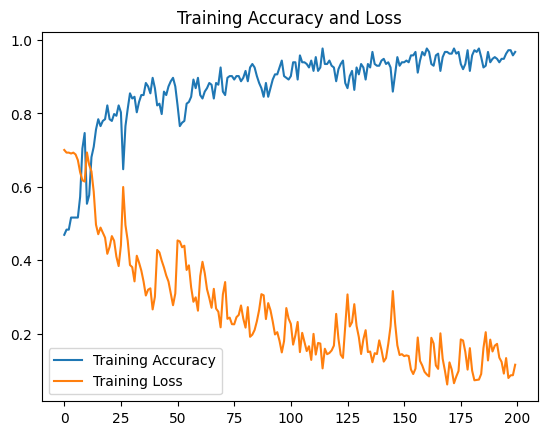

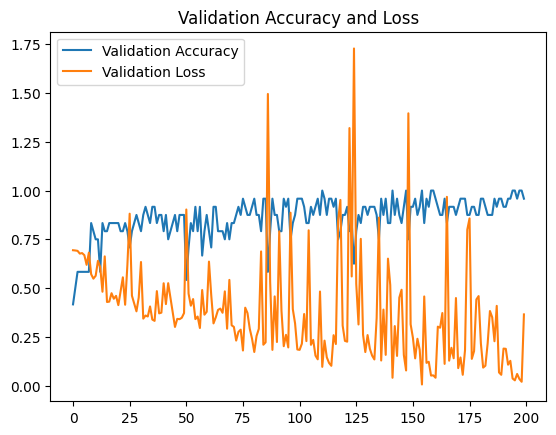

In [23]:
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

<div style='padding: 4px;
            padding-left: 7px;
           display:fill;
           border-radius:20px;
           background-color:#BEBEBE;
           font-size:200%;
           font-family: Calibri;
           color: #808080;
           text-shadow: 1px 1px 2px black;
           box-shadow: 10px 7px 4.5px gray;
           letter-spacing:0.5px;margin: 15px 15px 15px 15px'><h2>10. Predictions</h2></div>

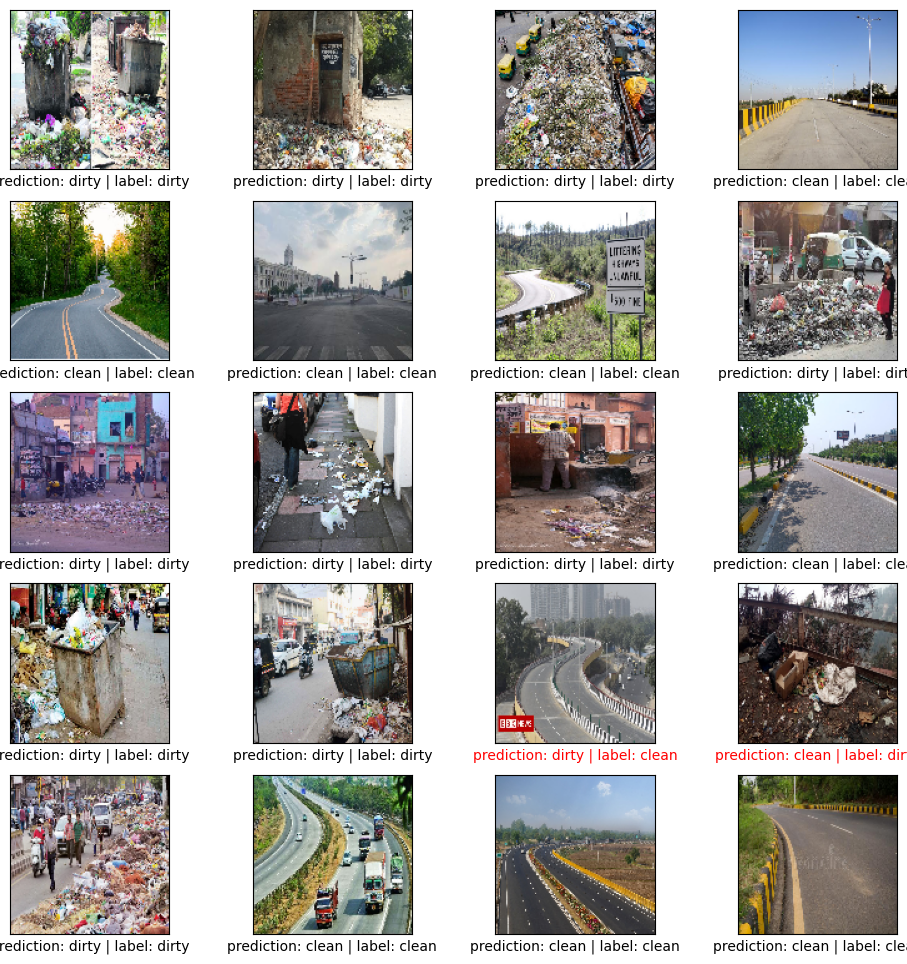

In [24]:
fig, axs = plt.subplots(5, 4, figsize=(12, 12))

i = 0
for x in range(5):
    for y in range(4):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0]
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        
        if np.argmax(prediction) != np.argmax(y_val[i]):   
            axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}', color='red')
        else:
            axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()